In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df=df.drop(["StockCode","Description"],axis=1)

In [ ]:
Frequency=df.groupby('CustomerID').agg({'InvoiceNo':'nunique'})
Frequency.rename(columns={'InvoiceNo':'frequency'},inplace=True)

In [ ]:
df['recency']=(max(df["InvoiceDate"])-df["InvoiceDate"]).dt.days
Recency=df.groupby('CustomerID').agg({'recency': 'min'})
Recency

,recency
CustomerID,
12346.0,325
12347.0,1
12348.0,74
12349.0,18
12350.0,309
...,...
18280.0,277
18281.0,180
18282.0,7


In [ ]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [ ]:
df['fullprice']=df["Quantity"]*df["UnitPrice"]
Spending=df.groupby("CustomerID").agg({'fullprice':'sum'})

In [ ]:
data=Spending.merge(Frequency,on='CustomerID')
data=data.merge(Recency,on='CustomerID')
data.head()

,fullprice,frequency,recency
CustomerID,,,
12346.0,77183.60,2,325
12347.0,4310.00,7,1
12348.0,1797.24,4,74
12349.0,1757.55,1,18
12350.0,334.40,1,309


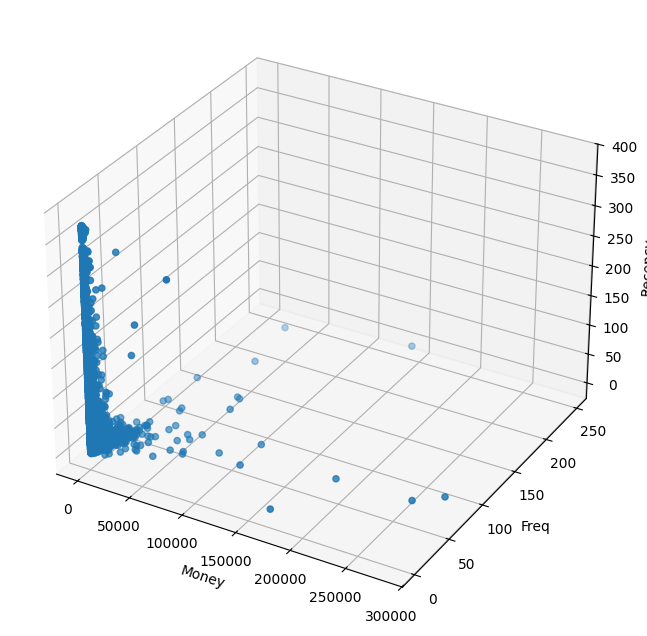

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
x=data['fullprice']
y=data['frequency']
z=data['recency']
ax.scatter(x, y, z)
ax.set_xlabel('Money')
ax.set_ylabel('Freq')
ax.set_zlabel('Recency')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_scaled= scaler.transform(data)

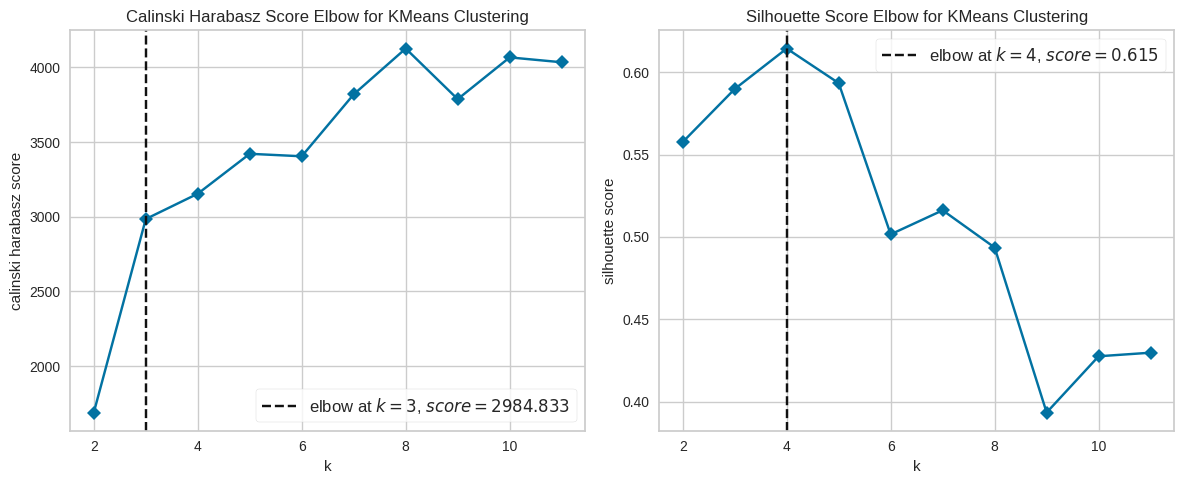

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Create figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12,5))

model = KMeans(random_state=42)

# First visualizer: Calinski-Harabasz
visualizer1 = KElbowVisualizer(model, k=(2,12),metric='calinski_harabasz',timings=False, ax=ax[0])
visualizer1.fit(data_scaled)
visualizer1.finalize()

# Second visualizer: Silhouette
visualizer2 = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False, ax=ax[1])
visualizer2.fit(data_scaled)
visualizer2.finalize()

plt.tight_layout()
plt.show()


In [ ]:
k=[3,4]
kmeans = KMeans(n_clusters=k[0], random_state=42)
data['Cluster_3'] = kmeans.fit_predict(data_scaled)
data.head()

,fullprice,frequency,recency,Cluster,Cluster_3
CustomerID,,,,,
12346.0,77183.60,2,325,0,1
12347.0,4310.00,7,1,3,0
12348.0,1797.24,4,74,3,0
12349.0,1757.55,1,18,3,0
12350.0,334.40,1,309,1,1


In [ ]:
data.groupby('Cluster_3')[['recency','frequency','fullprice']].mean()

,recency,frequency,fullprice
Cluster_3,,,
0,38.821108,5.608790,1884.384764
1,242.621771,1.873616,629.917815
2,4.875000,83.375000,89172.075833


In [ ]:
kmeans = KMeans(n_clusters=k[1], random_state=42)
data['Cluster_4'] = kmeans.fit_predict(data_scaled)
data.groupby('Cluster_4')[['recency','frequency','fullprice']].mean()

,recency,frequency,fullprice
Cluster_4,,,
0,13.381395,26.930233,12350.639907
1,244.844844,1.855251,483.934977
2,6.384615,99.076923,127338.313846
3,41.515717,4.294368,1338.933521


k=3 va être notre choix

In [ ]:
data.groupby('Cluster_3')[['recency','frequency','fullprice']].mean()

,recency,frequency,fullprice
Cluster_3,,,
0,38.821108,5.608790,1884.384764
1,242.621771,1.873616,629.917815
2,4.875000,83.375000,89172.075833


In [ ]:
data_3 = data.merge(df[['CustomerID','Country']].drop_duplicates(), on='CustomerID')
data_3.groupby('Cluster')['Country'].unique()

,Country
Cluster,
0,"[United Kingdom, Australia, Belgium, France, G..."
1,"[Norway, Bahrain, Spain, Belgium, Cyprus, Aust..."
2,"[Australia, United Kingdom, EIRE, Netherlands]"
3,"[Iceland, Finland, Italy, Norway, Portugal, Sw..."


**INTERPRETATION DE CHAQUE CLUSTER:**

Cluster 0 : clients fideles et depenseurs

Cluster 1 : clients pas très actifs et pas depenseurs

Cluster 2 : clients tres fideles et gros depenseurs